# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Sebastián Alejandro Veilleux Amaya

- ID: A01644977

- My carreer: ITC


# Importing libraries

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [272]:
df = pd.read_csv('A01644977_X.csv')

## b) Data managment


Print the first 7 rows

In [273]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,9.163279,8.344179,5.456439,8.201764,8.654010,-7.746564,7.007368,-0.055161,8.215739,8.624318,9.033208
1,1,7.529652,10.792057,-0.889002,-2.524700,-6.481682,-1.583033,0.789617,0.160248,8.264325,-2.988681,5.083509
2,2,-3.440641,-1.026183,1.214305,-1.752069,4.142595,3.015296,-4.950224,-5.114644,0.132685,8.551081,-8.864106
3,3,-3.324255,0.606243,1.985347,-0.543590,2.461912,-0.046286,-0.813252,-4.154509,-1.417154,5.976839,-6.528605
4,4,9.573051,7.159800,-7.859023,6.251691,-1.605634,8.351917,-6.248759,9.145850,-3.090741,-5.096099,13.786254
5,5,-0.734653,0.590932,2.083584,1.656602,-11.314785,-0.058283,-6.301149,8.119499,1.004853,4.870190,-5.005782
6,6,9.714737,9.124637,-7.147424,9.645504,-2.010365,8.060252,-5.124420,5.048489,-2.634360,-5.955776,10.582915


Print the last 4 rows

In [274]:
# last 4 rows
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
763,763,-1.704077,-3.079224,2.246051,6.156450,-3.906950,1.417686,-2.701117,8.246398,-1.679215,2.562114,-6.581163
764,764,-5.145945,-3.481130,3.023246,0.244004,7.966681,2.709229,-3.204342,-5.254968,0.304872,10.400826,-8.004664
765,765,2.387778,4.680123,2.641521,-2.286826,-8.059968,2.689932,-2.296515,2.198631,10.284256,-6.090083,3.375919
766,766,-3.679444,-3.099444,4.160905,8.458120,-7.412102,1.452045,-6.095217,8.644029,0.260813,3.584625,-7.911731


How many rows and columns are in your data?

Use the `shape` method


In [275]:
#Shape 
df.shape

(767, 12)

Print the name of all columns

Use the `columns` method

In [276]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [277]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
dtype: object

What is the meaning of rows and columns?

Your responses here

1. Unnamed is the id

2. x1, x2, ..., xn no info.

Print a statistical summary of your columns


In [278]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,383.000000,2.771720,3.248958,1.707407,3.085587,-2.062869,2.781341,0.806442,1.976376,4.171300,3.055129,0.105191
std,221.558119,5.478281,4.433877,4.740992,4.385088,7.296310,5.640041,6.585213,5.165910,5.800381,6.519508,6.597214
min,0.000000,-11.536044,-9.216324,-12.326067,-6.085439,-15.133723,-12.232755,-10.724720,-10.276701,-9.923272,-11.811390,-13.281928
25%,191.500000,-1.869875,-0.683235,0.732627,-0.641705,-8.418240,0.184687,-4.586252,-2.904834,-0.652695,-4.049136,-5.669909
50%,383.000000,2.289547,3.954237,2.854365,2.857453,-3.970919,3.205621,-1.549810,2.198631,4.981423,5.550540,-0.420843
75%,574.500000,7.700052,6.879898,4.762296,7.003486,5.038676,7.216501,7.796660,6.196379,9.103435,8.275629,5.653870
max,766.000000,15.539023,14.437786,10.808308,13.018203,13.490258,13.731398,15.011404,14.081329,15.839136,15.458529,14.061833


1. What is the minumum and maximum values of each variable:

2. What is the mean and standar deviation of each variable:

3. What the 25%, 50% and 75% represent?:

Rename the columns using the same name with capital letters

In [279]:
df.min()

Unnamed: 0     0.000000
x1           -11.536044
x2            -9.216324
x3           -12.326067
x4            -6.085439
x5           -15.133723
x6           -12.232755
x7           -10.724720
x8           -10.276701
x9            -9.923272
x10          -11.811390
x11          -13.281928
dtype: float64

In [280]:
df.max()

Unnamed: 0    766.000000
x1             15.539023
x2             14.437786
x3             10.808308
x4             13.018203
x5             13.490258
x6             13.731398
x7             15.011404
x8             14.081329
x9             15.839136
x10            15.458529
x11            14.061833
dtype: float64

In [281]:
df.mean()

Unnamed: 0    383.000000
x1              2.771720
x2              3.248958
x3              1.707407
x4              3.085587
x5             -2.062869
x6              2.781341
x7              0.806442
x8              1.976376
x9              4.171300
x10             3.055129
x11             0.105191
dtype: float64

In [282]:
df.std()

Unnamed: 0    221.558119
x1              5.478281
x2              4.433877
x3              4.740992
x4              4.385088
x5              7.296310
x6              5.640041
x7              6.585213
x8              5.165910
x9              5.800381
x10             6.519508
x11             6.597214
dtype: float64

In [283]:
df.quantile([0.25,0.5,0.75])

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0.25,191.5,-1.869875,-0.683235,0.732627,-0.641705,-8.418240,0.184687,-4.586252,-2.904834,-0.652695,-4.049136,-5.669909
0.50,383.0,2.289547,3.954237,2.854365,2.857453,-3.970919,3.205621,-1.549810,2.198631,4.981423,5.550540,-0.420843
0.75,574.5,7.700052,6.879898,4.762296,7.003486,5.038676,7.216501,7.796660,6.196379,9.103435,8.275629,5.653870


Rename the columns to their original names

In [284]:
df_cap = df.copy()
df_cap.columns = [col.upper() for col in df_cap.columns]
print(df_cap.columns.tolist(), "\n")


['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'] 



In [285]:
df_cap.columns = df.columns
print(df_cap.columns.tolist(), "\n")


['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11'] 



Use two different alternatives to get one of the columns

In [286]:
print(df.get('x1'))
# print(df['x1'])

0      9.163279
1      7.529652
2     -3.440641
3     -3.324255
4      9.573051
         ...   
762    2.634957
763   -1.704077
764   -5.145945
765    2.387778
766   -3.679444
Name: x1, Length: 767, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [287]:
slice_df = df.iloc[62:73, 1:3]
print(slice_df)

           x1        x2
62  -0.175066 -5.050899
63   7.485539  6.802230
64  -2.935129  1.687293
65   9.209391  6.899492
66  -1.863873 -1.330099
67  -4.439468 -3.057558
68  -4.645905 -4.048697
69   5.962865  1.882377
70  10.627606  4.702143
71   8.400355  5.800055
72   8.314710  5.763110


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [288]:
for col in df.columns[1:3]:
    num_null = df[col].isnull().sum()
    num_not_null = df[col].notnull().sum()
    total_rows = df.shape[0]
    print(f"Column '{col}': Null = {num_null}, Not Null = {num_not_null}, Total = {total_rows}")
    if num_null + num_not_null == total_rows:
        print("Equal total rows.\n")
    else:
        print("Not equal total rows.\n")


Column 'x1': Null = 0, Not Null = 767, Total = 767
Equal total rows.

Column 'x2': Null = 0, Not Null = 767, Total = 767
Equal total rows.



Discard the last column


In [289]:
df_dropped = df.iloc[:, :-1]

### Questions

Based on the previos results, provide a full description of yout dataset

Your response:

767 rows and 12 columns

x variables are int64

Scatter show fulls relationships among pairs of variable

The dataset is collection of numeric measurement that describe something, kind of like a behavior
which can be investigated furter with other ML techinques



## c) Data visualization

Plot in the histogram of one of the variables

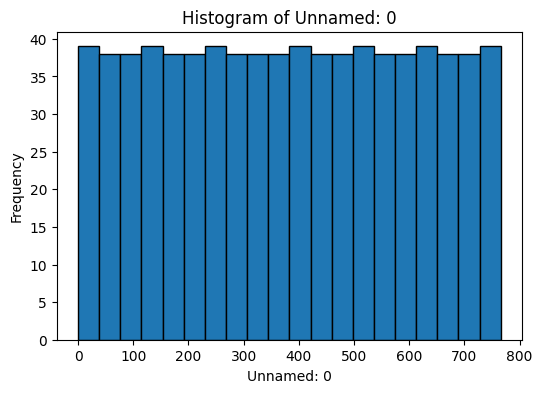

In [290]:
plt.figure(figsize=(6,4))
plt.hist(df_dropped.iloc[:, 0].dropna(), bins=20, edgecolor='black')
plt.title(f"Histogram of {df_dropped.columns[0]}")
plt.xlabel(df_dropped.columns[0])
plt.ylabel("Frequency")
plt.show()

Plot in the same figure the histogram of two variables



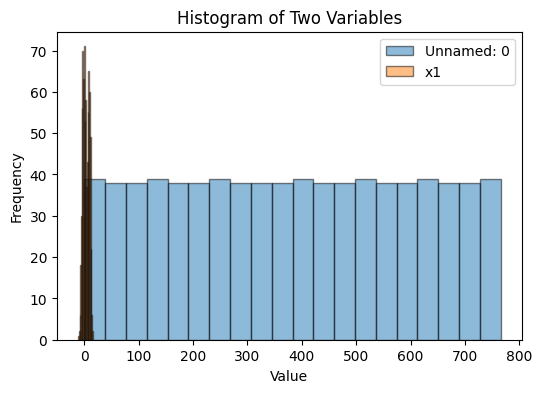

In [291]:
plt.figure(figsize=(6,4))
plt.hist(df_dropped.iloc[:, 0].dropna(), bins=20, alpha=0.5, label=df_dropped.columns[0], edgecolor='black')
plt.hist(df_dropped.iloc[:, 1].dropna(), bins=20, alpha=0.5, label=df_dropped.columns[1], edgecolor='black')
plt.title("Histogram of Two Variables")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot the boxplot of one of the variables

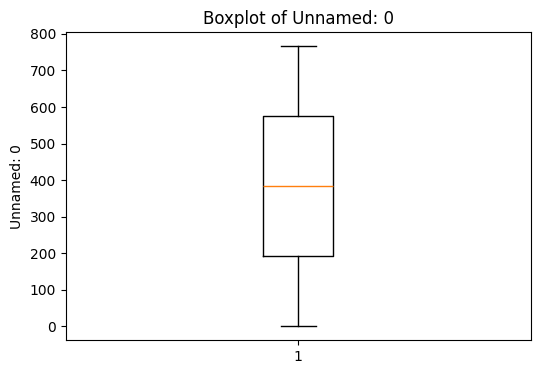

In [292]:
plt.figure(figsize=(6,4))
plt.boxplot(df_dropped.iloc[:, 0].dropna())
plt.title(f"Boxplot of {df_dropped.columns[0]}")
plt.ylabel(df_dropped.columns[0])
plt.show()

Plot in the same figure the boxplot of two variables

C:\Users\seval\AppData\Local\Temp\ipykernel_20572\3614497143.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_dropped.iloc[:, 0].dropna(), df_dropped.iloc[:, 1].dropna()], labels=[df_dropped.columns[0], df_dropped.columns[1]])


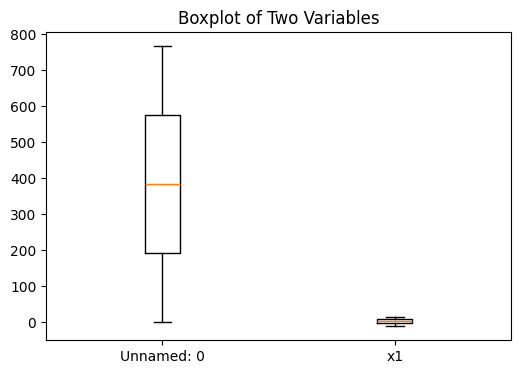

In [293]:
plt.figure(figsize=(6,4))
plt.boxplot([df_dropped.iloc[:, 0].dropna(), df_dropped.iloc[:, 1].dropna()], labels=[df_dropped.columns[0], df_dropped.columns[1]])
plt.title("Boxplot of Two Variables")
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot the scatter plot between all pair of variables

<Figure size 800x800 with 0 Axes>

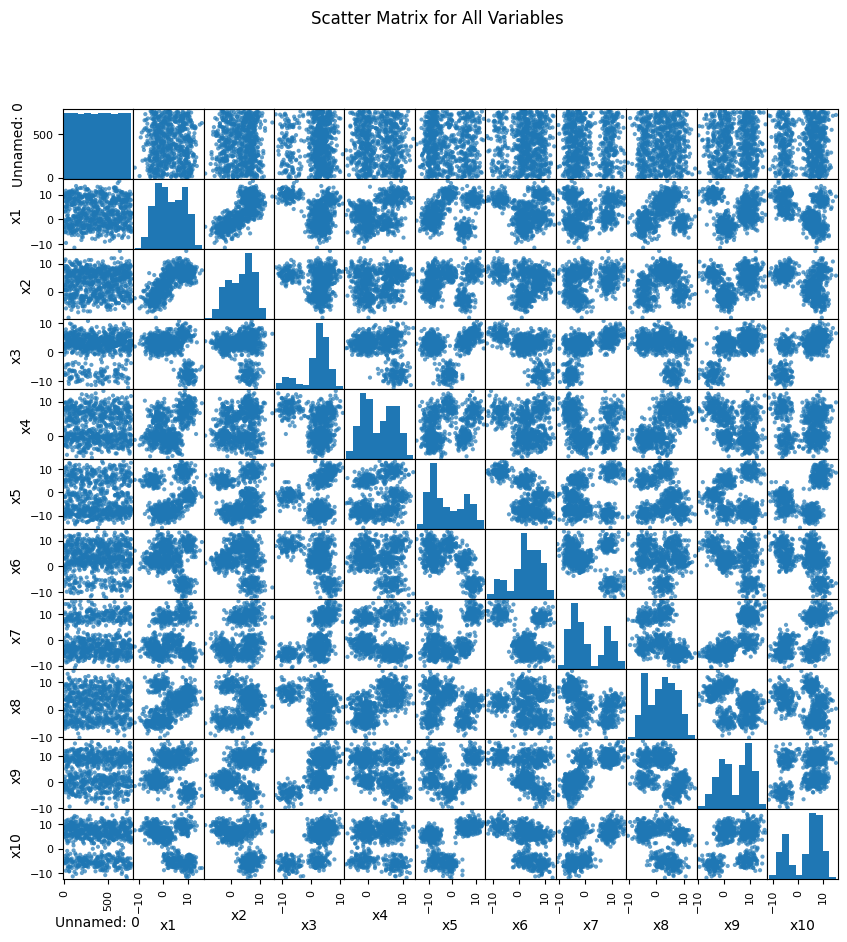

In [294]:
plt.figure(figsize=(8,8))
scatter_matrix(df_dropped, alpha=0.7, figsize=(10,10), diagonal='hist')
plt.suptitle("Scatter Matrix for All Variables")
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:


The individual ones show that there may be a symetric distribution while others show weakness. 

Boxplot suggest that most of the data points are clustered around central values 
but there are some extreme values which could affect the values statically

Clusters and Trendds are kind of visible but will be further supported by clustering analyses

## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [295]:
k = 3
kmeans_model = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans_model.fit_predict(df_dropped.select_dtypes(include=[np.number]))

Add to your dataset a column with the estimated cluster to each data point

In [296]:
df_dropped['Cluster'] = cluster_labels

Print the number associated to each cluster

In [297]:
print("Data points per cluster:")
print(df_dropped['Cluster'].value_counts(), "\n")

Data points per cluster:
Cluster
0    256
1    256
2    255
Name: count, dtype: int64 



Print the centroids

In [298]:
print("Cluster Centroids:")
print(kmeans_model.cluster_centers_, "\n")

Cluster Centroids:
[[ 3.82500000e+02  2.68870204e+00  3.15349478e+00  1.47318539e+00
   3.02896206e+00 -2.57956297e+00  3.08692835e+00  9.00966267e-01
   1.96729632e+00  4.26312969e+00  2.77540051e+00]
 [ 6.38500000e+02  2.90848821e+00  3.48946867e+00  2.06018998e+00
   3.14010811e+00 -2.07332773e+00  2.41226044e+00  1.29082392e+00
   2.15022240e+00  4.46236452e+00  3.36306345e+00]
 [ 1.27000000e+02  2.71776005e+00  3.10334287e+00  1.58838131e+00
   3.08769894e+00 -1.53364858e+00  2.84508260e+00  2.25264828e-01
   1.81096355e+00  3.78690383e+00  3.02681188e+00]] 



Print the intertia metric

In [299]:
print("KMeans Inertia:", kmeans_model.inertia_, "\n")

KMeans Inertia: 4424499.477265596 



Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

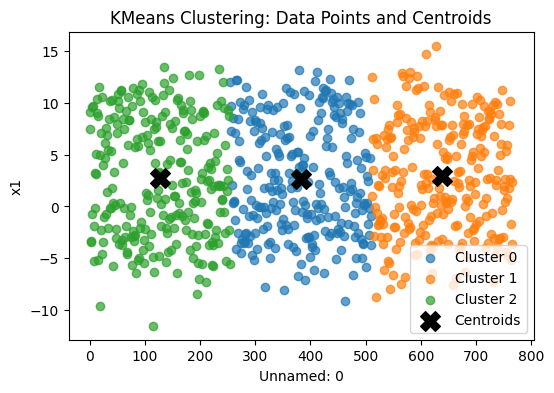

In [300]:
plt.figure(figsize=(6,4))
feature_x = df_dropped.columns[0]
feature_y = df_dropped.columns[1]
for cluster in range(k):
    subset = df_dropped[df_dropped['Cluster'] == cluster]
    plt.scatter(subset[feature_x], subset[feature_y], label=f"Cluster {cluster}", alpha=0.7)
centroids = kmeans_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("KMeans Clustering: Data Points and Centroids")
plt.legend()
plt.show()
# Made with help of GitHubCopilot


### Questions

Provides a detailed description of your results

Your response:

## d) Elbow plot

Compute the Elbow plot

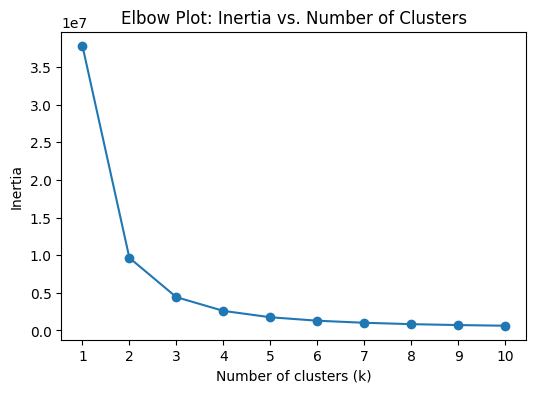

In [301]:
inertias = []
k_values = range(1, 11)
for k_val in k_values:
    km = KMeans(n_clusters=k_val, random_state=42)
    km.fit(df_dropped.select_dtypes(include=[np.number]).drop(columns=['Cluster'], errors='ignore'))
    inertias.append(km.inertia_)


plt.figure(figsize=(6,4))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Plot: Inertia vs. Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [302]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits = digits.data
y_digits = digits.target
images = digits.images 

2) Plot some of the observations (add in the title the label/digit of that obserbation)

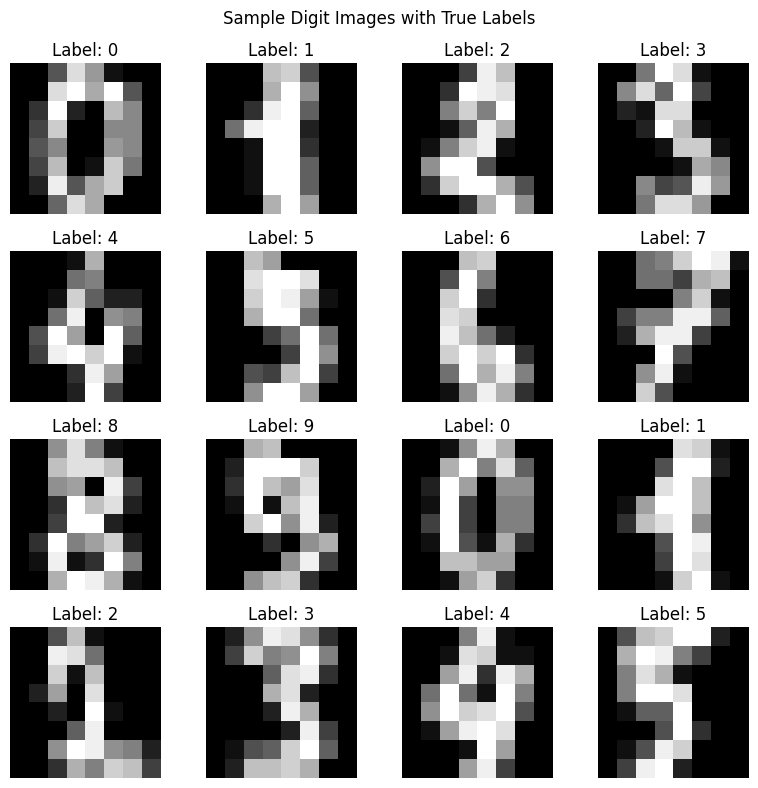

In [303]:
fig, axes = plt.subplots(4, 4, figsize=(8,8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {y_digits[i]}")
    ax.axis('off')
plt.suptitle("Sample Digit Images with True Labels")
plt.tight_layout()
plt.show()


3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

5) Compute the Elbow plot

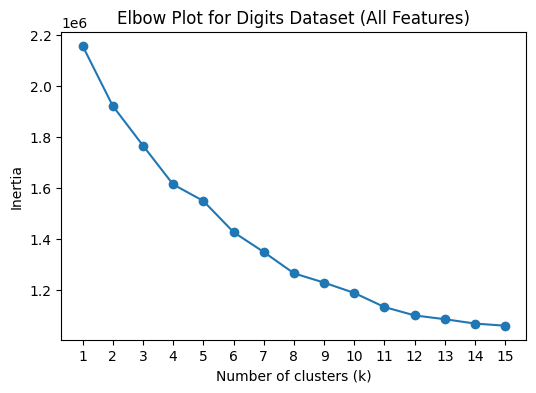

In [304]:
inertias_digits = []
k_values_digits = range(1, 16)
for k_val in k_values_digits:
    km = KMeans(n_clusters=k_val, random_state=42)
    km.fit(X_digits)
    inertias_digits.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values_digits, inertias_digits, marker='o')
plt.title("Elbow Plot for Digits Dataset (All Features)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values_digits)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

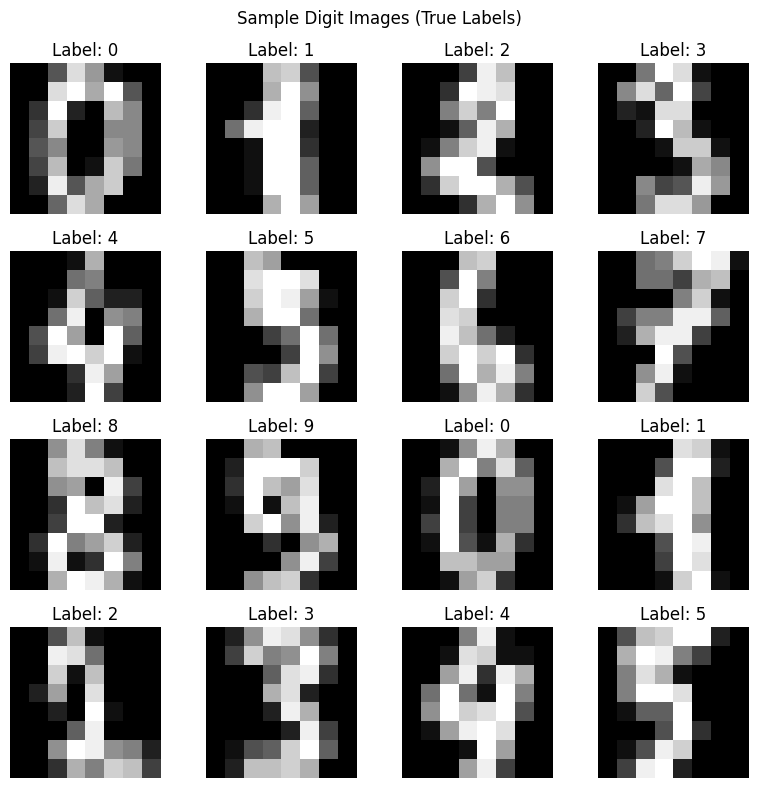

In [305]:
digits = load_digits()
X_all = digits.data        # 64 features per sample (flattened 8x8 image)
y = digits.target
images = digits.images     # Original 8x8 images for plotting
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle("Sample Digit Images (True Labels)")
plt.tight_layout()
plt.show()

3) Split the dataset in train and test

In [306]:
indices = np.arange(len(X_all))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
X_train_all = X_all[train_idx]
X_test_all  = X_all[test_idx]
y_train = y[train_idx]
y_test  = y[test_idx]

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


5) Make predictions (use the test set)

In [307]:
clf_all = SVC(gamma='scale', random_state=42)
clf_all.fit(X_train_all, y_train)
y_pred_all = clf_all.predict(X_test_all)

6) Compute performance metrics

In [308]:
print("ClassifierAll (using all 64 features):")
print("Accuracy:", accuracy_score(y_test, y_pred_all))
print(classification_report(y_test, y_pred_all))


ClassifierAll (using all 64 features):
Accuracy: 0.9861111111111112
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

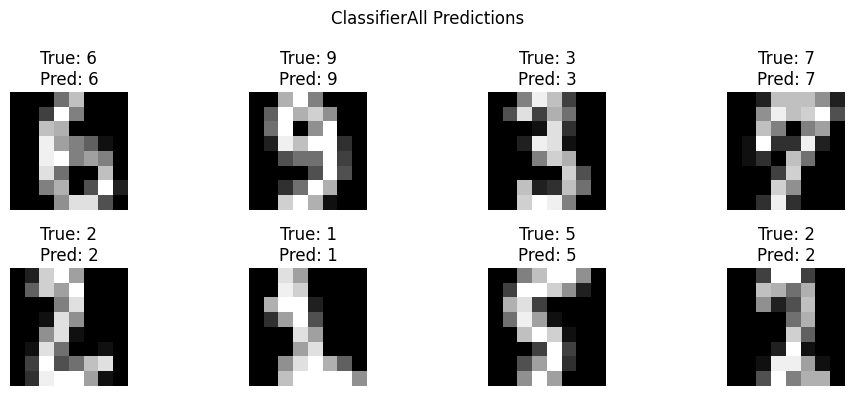

In [309]:
plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[test_idx[i]], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_all[i]}")
    plt.axis('off')
plt.suptitle("ClassifierAll Predictions")
plt.tight_layout()
plt.show()


Classifier1col (using first column of pixels):
Accuracy: 0.08055555555555556
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.08      1.00      0.15        28
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        34
           4       1.00      0.02      0.04        46
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        34
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        40

    accuracy                           0.08       360
   macro avg       0.11      0.10      0.02       360
weighted avg       0.13      0.08      0.02       360



c:\Users\seval\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\seval\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\seval\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

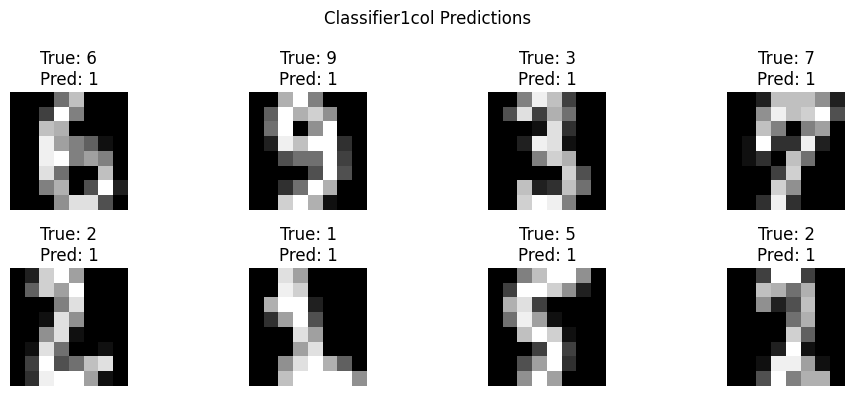

In [310]:
X_first_col = digits.images[:, :, 0]  # shape (n_samples, 8)
X_train_1col = X_first_col[train_idx]
X_test_1col  = X_first_col[test_idx]

clf_1col = SVC(gamma='scale', random_state=42)
clf_1col.fit(X_train_1col, y_train)
y_pred_1col = clf_1col.predict(X_test_1col)

print("Classifier1col (using first column of pixels):")
print("Accuracy:", accuracy_score(y_test, y_pred_1col))
print(classification_report(y_test, y_pred_1col))

plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[test_idx[i]], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_1col[i]}")
    plt.axis('off')
plt.suptitle("Classifier1col Predictions")
plt.tight_layout()
plt.show()


Classifier4col (using fourth column of pixels):
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.62      0.79      0.69        33
           1       0.74      0.89      0.81        28
           2       0.59      0.67      0.63        33
           3       0.59      0.65      0.62        34
           4       0.89      0.70      0.78        46
           5       0.55      0.38      0.45        47
           6       0.75      0.69      0.72        35
           7       0.67      0.76      0.71        34
           8       0.75      0.70      0.72        30
           9       0.57      0.60      0.59        40

    accuracy                           0.67       360
   macro avg       0.67      0.68      0.67       360
weighted avg       0.67      0.67      0.66       360



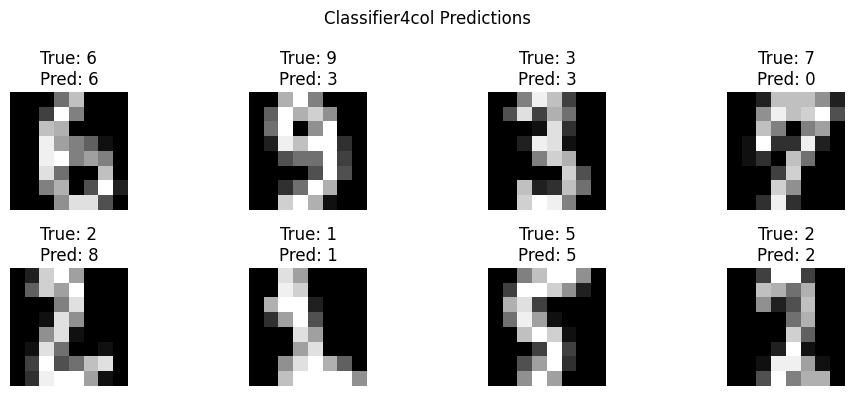

In [311]:
X_fourth_col = digits.images[:, :, 3]  # shape (n_samples, 8)
X_train_4col = X_fourth_col[train_idx]
X_test_4col  = X_fourth_col[test_idx]

clf_4col = SVC(gamma='scale', random_state=42)
clf_4col.fit(X_train_4col, y_train)
y_pred_4col = clf_4col.predict(X_test_4col)

print("Classifier4col (using fourth column of pixels):")
print("Accuracy:", accuracy_score(y_test, y_pred_4col))
print(classification_report(y_test, y_pred_4col))

plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[test_idx[i]], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_4col[i]}")
    plt.axis('off')
plt.suptitle("Classifier4col Predictions")
plt.tight_layout()
plt.show()

Classifier8col (using eighth column of pixels):
Accuracy: 0.14722222222222223
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.43      0.11      0.17        28
           2       0.45      0.15      0.23        33
           3       0.10      0.97      0.18        34
           4       1.00      0.13      0.23        46
           5       0.00      0.00      0.00        47
           6       0.50      0.06      0.10        35
           7       0.67      0.12      0.20        34
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        40

    accuracy                           0.15       360
   macro avg       0.32      0.15      0.11       360
weighted avg       0.32      0.15      0.11       360



c:\Users\seval\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\seval\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\seval\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

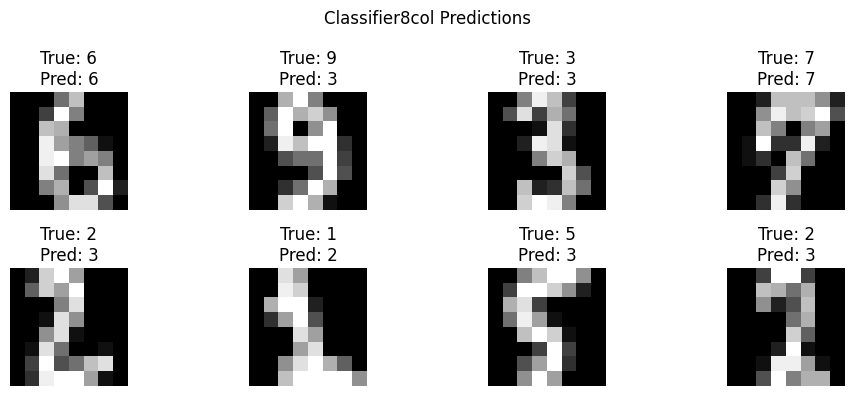

In [312]:
X_eighth_col = digits.images[:, :, 7]  # shape (n_samples, 8)
X_train_8col = X_eighth_col[train_idx]
X_test_8col  = X_eighth_col[test_idx]

clf_8col = SVC(gamma='scale', random_state=42)
clf_8col.fit(X_train_8col, y_train)
y_pred_8col = clf_8col.predict(X_test_8col)

print("Classifier8col (using eighth column of pixels):")
print("Accuracy:", accuracy_score(y_test, y_pred_8col))
print(classification_report(y_test, y_pred_8col))

plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[test_idx[i]], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_8col[i]}")
    plt.axis('off')
plt.suptitle("Classifier8col Predictions")
plt.tight_layout()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

64 features classifier performed well achieving almos 99. Using only one column showed
much more poorer performance. In particular Classifier4col achieved  a moderated accuracy
but others were below 10. This indicates that the complete image representation 
is essential for achieving high classification accuracy.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Se han identificado patrones y relaciones entre variables mediante análisis visuales
los cuales me han permitido detectar correlaciones y outliers, lo que también ha 
permitido la elección de variables.

Mediante técnicas de clustering también se han construido modelos simples que reproducen
el comportamiento del fenómeno. Estos resultados obtenidos refuerzan mi hipótesis acerca
de la interacción entre estas variables y refuerzan el uso de modelos bivariados
para la explicación de el comportamiento de los datos.